# 고급 통계
---

## 1️⃣ 회귀 분석
---

### (1) 단순 선형 회귀 분석
---

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# 조정된 데이터 생성 : 온도와 아이스크림 매출
np.random.seed(0)

temperatures = np.random.randint(20, 35, 100)   # 더 많은 데이터 포인트 추가
sales = (temperatures * 70) - 500 + np.random.normal(0, 100, 100)  # 기울기와 절편 조정, 변동성 조정

# 데이터프레임 생성
data = pd.DataFrame({
    'temperature': temperatures,
    'ice_cream_sales': sales
})

In [ ]:
# ✅ statsmodels를 사용한 단순 선형 회귀 재적합
## 독립 변수 생성
X = data['temperature']

## 종속 변수 생성
y = data['ice_cream_sales']

## 상수항 추가
X = sm.add_constant(data['temperature'])

## 회귀 모델 생성
model = sm.OLS(y, X).fit()

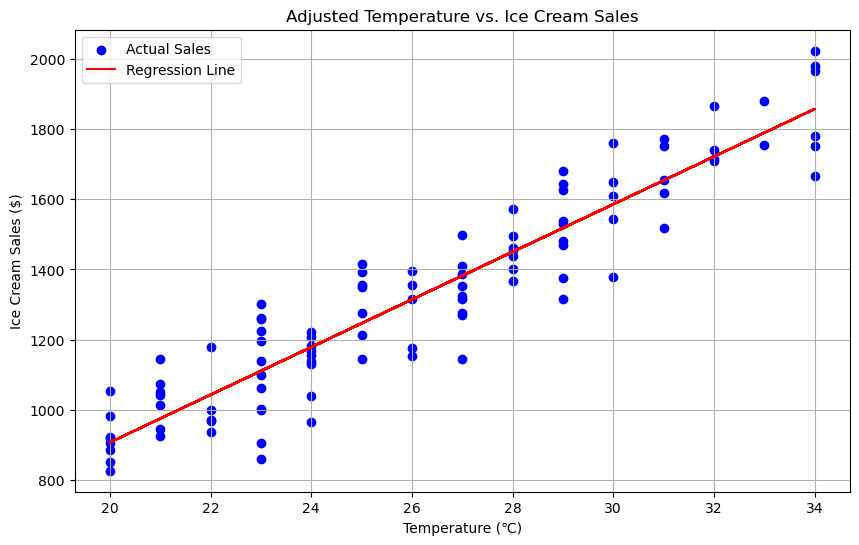

In [24]:
# (참고) 시각화
## 회귀선
data['predicted_sales'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['temperature'], data['ice_cream_sales'], color='blue', label='Actual Sales')
plt.plot(data['temperature'], data['predicted_sales'], color='red', label='Regression Line')
plt.title('Adjusted Temperature vs. Ice Cream Sales')
plt.xlabel('Temperature (℃)')
plt.ylabel('Ice Cream Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ✅ 모델링 결과 확인
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        ice_cream_sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     680.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           6.90e-46
Time:                        01:09:20   Log-Likelihood:                -606.75
No. Observations:                 100   AIC:                             1217.
Df Residuals:                      98   BIC:                             1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -452.2143     68.982     -6.556      

### (2) 다중 선형 회귀 분석
---

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [31]:
# 데이터 생성
np.random.seed(0)

fish_length = np.random.uniform(15, 40, 100)   # 길이
fish_width = np.random.uniform(5, 10, 100)   # 폭 
fish_thickness = np.random.uniform(1, 5, 100)   # 두께 
fish_fin_length = np.random.uniform(3, 8, 100)   # 지느러미 길이

fish_weight = 200 + (20 * fish_length) + (10 * fish_width) + (5 * fish_thickness) + (15 * fish_fin_length) + np.random.normal(0, 10, 100)

# 데이터프레임 생성
fish_data = pd.DataFrame({
    'length': fish_length,
    'width': fish_width,
    'thickness': fish_thickness,
    'fin_length': fish_fin_length,
    'weight': fish_weight,
})

In [34]:
# ✅ 다중 선형 회귀 모델 생성
## 독립 변수 생성
X = fish_data[['length', 'width', 'thickness', 'fin_length']]

## 종속 변수 생성
y = fish_data['weight']

## 상수항 추가
X = sm.add_constant(X)

## 회귀 모델 생성
model = sm.OLS(y, X).fit()

In [35]:
# ✅ 모델링 결과 확인
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6359.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.96e-114
Time:                        01:34:30   Log-Likelihood:                -361.50
No. Observations:                 100   AIC:                             733.0
Df Residuals:                      95   BIC:                             746.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.6867      8.260     23.207      0.0

### (3) 다항 회귀 분석
---

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# 데이터 생성
np.random.seed(0)

house_size = np.random.uniform(50, 250, 100)   # 주택 크기 : 50제곱미터 ~ 250제곱미터
house_price = 5000 + (20 * house_size) + (0.2 * house_size) ** 2 + np.random.normal(0, 2000, 100)  # 주택 가격 : 강한 비선형 관계

# 데이터프레임 생성
house_data = pd.DataFrame({
    'size': house_size,
    'price': house_price
})

# 다항 특성 생성 : size^2
house_data['size^2'] = house_data['size'] ** 2

In [ ]:
# ✅ 다항 회귀 모델 생성
## 독립 변수 생성
X = house_data[['size', 'size^2']]

## 종속 변수 생성
y = house_data['price']

## 상수항 추가
X = sm.add_constant(X)

## 회귀 모델 생성
model = sm.OLS(y, X).fit()

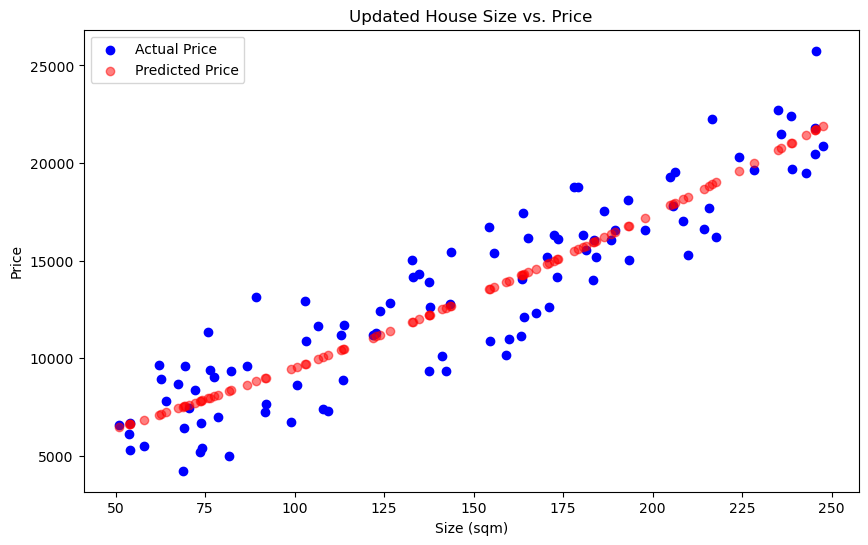

In [10]:
# (참고) 시각화
plt.figure(figsize=(10, 6))
plt.scatter(house_data['size'], house_data['price'], color='blue', label='Actual Price')

## 예측 가격 계산 및 플롯
predicted_price = model.predict(X)
plt.scatter(house_data['size'], predicted_price, color='red', label='Predicted Price', alpha=0.5)
plt.title('Updated House Size vs. Price')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# ✅ 모델링 결과 확인
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.15e-39
Time:                        00:31:26   Log-Likelihood:                -900.64
No. Observations:                 100   AIC:                             1807.
Df Residuals:                      97   BIC:                             1815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3835.8351   1312.331      2.923      0.0

### (4) 로지스틱 회귀
---

In [36]:
from sklearn.datasets import load_iris
import pandas as pd
import statsmodels.api as sm

In [37]:
# iris 데이터셋 불러오기
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# versicolor(1)와 virginica(2)만 선택하고, 종(species)을 이진 변수로 변환하기
## versicolor=0, virginica=1
iris_df['species'] = iris.target
iris_filtered = iris_df[(iris_df['species'] == 1) | (iris_df['species'] == 2)]
iris_filtered['species'] = iris_filtered['species'].map({ 1: 0, 2: 1 })

C:\Users\kss34\AppData\Local\Temp\ipykernel_38248\2504112447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_filtered['species'] = iris_filtered['species'].map({ 1: 0, 2: 1 })


In [ ]:
# ✅ 로지스틱 회귀 모델 생성
## 독립 변수 생성
X = iris_filtered.drop('species', axis=1)

## 종속 변수 생성
y = iris_filtered['species']

## 상수항 추가
X = sm.add_constant(X)

## 회귀 모델 생성
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12


In [40]:
# ✅ 모델링 결과 확인
summary = model.summary()
print(summary)

                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Nov 2024   Pseudo R-squ.:                  0.9142
Time:                        01:57:48   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

- 오즈비 계산하기

In [ ]:
import numpy as np
import pandas as pd

# 회귀 계수를 딕셔너리로 만들기
coefficients = {
    'const': -42.6378,
    'sepal length (cm)': -2.4652,
    'sepal width (cm)': -6.6809,
    'petal length (cm)': 9.4294,
    'petal width (cm)': 18.2861
}

# 각 계수의 지수를 취해 오즈비 계산
odds_ratios = {var: np.exp(coef) for var, coef in coefficients.items()}

# 데이터프레임으로 만들기
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Variable', 'Odds Ratio'])

print(odds_ratios_df)

            Variable    Odds Ratio
0              const  3.038357e-19
1  sepal length (cm)  8.499184e-02
2   sepal width (cm)  1.254648e-03
3  petal length (cm)  1.244906e+04
4   petal width (cm)  8.740823e+07
